# **Hemanth Algotrading contest submission**


## **Load up libraries and data**

In [148]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [149]:
cryptocurrency = ['ETH-USD']
start_date = '2021-01-01'
end_date = '2023-12-31'
cryptocurrency_df = yf.download(cryptocurrency, start=start_date, end=end_date, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [150]:
print(cryptocurrency_df.head(10))

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-01   737.708374   749.201843   719.792236   730.367554   730.367554   
2021-01-02   730.402649   786.798462   718.109497   774.534973   774.534973   
2021-01-03   774.511841  1006.565002   771.561646   975.507690   975.507690   
2021-01-04   977.058838  1153.189209   912.305359  1040.233032  1040.233032   
2021-01-05  1041.498779  1129.371460   986.811279  1100.006104  1100.006104   
2021-01-06  1101.005005  1209.428589  1064.233398  1207.112183  1207.112183   
2021-01-07  1208.078369  1282.579590  1167.443115  1225.678101  1225.678101   
2021-01-08  1225.967896  1273.827515  1076.081543  1224.197144  1224.197144   
2021-01-09  1223.740479  1303.871826  1182.270386  1281.077271  1281.077271   
2021-01-10  1280.871094  1347.926147  1194.715576  1262.246704  1262.246704   

                 Volume  
Date                     

In [151]:
cryptocurrency_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...
2023-12-26,2272.218750,2274.557373,2180.225342,2231.465332,2231.465332,10668581464
2023-12-27,2231.393066,2392.608643,2215.140381,2378.739990,2378.739990,14161342927
2023-12-28,2380.200684,2445.017578,2338.703857,2347.566162,2347.566162,15660799060


In [152]:
cryptocurrency_df.reset_index(inplace=True)
print(cryptocurrency_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [153]:
cryptocurrency_df['Date'] = pd.to_datetime(cryptocurrency_df['Date'])

fig = go.Figure(data=[go.Candlestick(x=cryptocurrency_df['Date'],
                                     open=cryptocurrency_df['Open'],
                                     high=cryptocurrency_df['High'],
                                     low=cryptocurrency_df['Low'],
                                     close=cryptocurrency_df['Close'])])

fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

## **Setting up the indicators**

In [154]:
cryptocurrency_df['7d_EMA'] = cryptocurrency_df['Close'].ewm(span=7, adjust=False).mean()
cryptocurrency_df


,Date,Open,High,Low,Close,Adj Close,Volume,7d_EMA
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,730.367554
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,741.409409
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,799.933979
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,860.008742
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,920.008083
...,...,...,...,...,...,...,...,...
1089,2023-12-26,2272.218750,2274.557373,2180.225342,2231.465332,2231.465332,10668581464,2257.253810
1090,2023-12-27,2231.393066,2392.608643,2215.140381,2378.739990,2378.739990,14161342927,2287.625355
1091,2023-12-28,2380.200684,2445.017578,2338.703857,2347.566162,2347.566162,15660799060,2302.610557
1092,2023-12-29,2346.843750,2386.004639,2262.975830,2300.690674,2300.690674,12536968996,2302.130586


In [155]:
cryptocurrency_df['HA_Close'] = (cryptocurrency_df['Open'] + cryptocurrency_df['High'] + cryptocurrency_df['Low'] + cryptocurrency_df['Close']) / 4

cryptocurrency_df['HA_Open'] = (cryptocurrency_df['Open'] + cryptocurrency_df['Close']) / 2
cryptocurrency_df['HA_Open'] = cryptocurrency_df['HA_Open'].shift(1)
cryptocurrency_df['HA_Open'].iloc[0] = (cryptocurrency_df['Open'].iloc[0] + cryptocurrency_df['Close'].iloc[0]) / 2  # Initial value

cryptocurrency_df['HA_High'] = cryptocurrency_df[['High', 'HA_Open', 'HA_Close']].max(axis=1)

cryptocurrency_df['HA_Low'] = cryptocurrency_df[['Low', 'HA_Open', 'HA_Close']].min(axis=1)
cryptocurrency_df

<ipython-input-155-3faf1652f02f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,7d_EMA,HA_Close,HA_Open,HA_High,HA_Low
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,730.367554,734.267502,734.037964,749.201843,719.792236
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,741.409409,752.461395,734.037964,786.798462,718.109497
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,799.933979,882.036545,752.468811,1006.565002,752.468811
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,860.008742,1020.696609,875.009766,1153.189209,875.009766
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,920.008083,1064.421906,1008.645935,1129.371460,986.811279
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-12-26,2272.218750,2274.557373,2180.225342,2231.465332,2231.465332,10668581464,2257.253810,2239.616699,2268.951172,2274.557373,2180.225342
1090,2023-12-27,2231.393066,2392.608643,2215.140381,2378.739990,2378.739990,14161342927,2287.625355,2304.470520,2251.842041,2392.608643,2215.140381
1091,2023-12-28,2380.200684,2445.017578,2338.703857,2347.566162,2347.566162,15660799060,2302.610557,2377.872070,2305.066528,2445.017578,2305.066528
1092,2023-12-29,2346.843750,2386.004639,2262.975830,2300.690674,2300.690674,12536968996,2302.130586,2324.128723,2363.883423,2386.004639,2262.975830


In [156]:
HAfigure = go.Figure(data=[go.Candlestick(x=cryptocurrency_df['Date'],
                                     open=cryptocurrency_df['Open'],
                                     high=cryptocurrency_df['High'],
                                     low=cryptocurrency_df['Low'],
                                     close=cryptocurrency_df['Close'])])

HAfigure.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
HAfigure.show()
fig.show()

In [157]:
cryptocurrency_df['High-Low'] = cryptocurrency_df['High'] - cryptocurrency_df['Low']
cryptocurrency_df['High-PreviousClose'] = abs(cryptocurrency_df['High'] - cryptocurrency_df['Close'].shift())
cryptocurrency_df['Low-PreviousClose'] = abs(cryptocurrency_df['Low'] - cryptocurrency_df['Close'].shift())
cryptocurrency_df['TR'] = cryptocurrency_df[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)

# Calculate Directional Movement (DM)
cryptocurrency_df['UpMove'] = cryptocurrency_df['High'] - cryptocurrency_df['High'].shift()
cryptocurrency_df['DownMove'] = cryptocurrency_df['Low'].shift() - cryptocurrency_df['Low']
cryptocurrency_df['DM+'] = cryptocurrency_df['UpMove'].where(cryptocurrency_df['UpMove'] > cryptocurrency_df['DownMove'], 0)
cryptocurrency_df['DM-'] = cryptocurrency_df['DownMove'].where(cryptocurrency_df['DownMove'] > cryptocurrency_df['UpMove'], 0)

# Calculate Smoothed True Range (ATR)
cryptocurrency_df['TR_14'] = cryptocurrency_df['TR'].rolling(window=14).mean()

# Calculate Smoothed Directional Movement (DMP and DMM)
cryptocurrency_df['DM+_14'] = cryptocurrency_df['DM+'].rolling(window=14).mean()
cryptocurrency_df['DM-_14'] = cryptocurrency_df['DM-'].rolling(window=14).mean()

# Calculate the Directional Index (DI+) and (DI-)
cryptocurrency_df['DI+'] = (cryptocurrency_df['DM+_14'] / cryptocurrency_df['TR_14']) * 100
cryptocurrency_df['DI-'] = (cryptocurrency_df['DM-_14'] / cryptocurrency_df['TR_14']) * 100

# Calculate the Absolute Directional Index (DX)
cryptocurrency_df['DX'] = abs((cryptocurrency_df['DI+'] - cryptocurrency_df['DI-']) / (cryptocurrency_df['DI+'] + cryptocurrency_df['DI-'])) * 100

# Calculate the 15-day ADX
cryptocurrency_df['ADX_15'] = cryptocurrency_df['DX'].rolling(window=15).mean()

# Drop the intermediate columns used for calculation
cryptocurrency_df.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'UpMove', 'DownMove', 'DM+', 'DM-', 'TR_14', 'DM+_14', 'DM-_14', 'DX'], inplace=True)
cryptocurrency_df

,Date,Open,High,Low,Close,Adj Close,Volume,7d_EMA,HA_Close,HA_Open,HA_High,HA_Low,TR,DI+,DI-,ADX_15
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,730.367554,734.267502,734.037964,749.201843,719.792236,29.409607,NaN,NaN,NaN
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,741.409409,752.461395,734.037964,786.798462,718.109497,68.688965,NaN,NaN,NaN
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,799.933979,882.036545,752.468811,1006.565002,752.468811,235.003357,NaN,NaN,NaN
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,860.008742,1020.696609,875.009766,1153.189209,875.009766,240.883850,NaN,NaN,NaN
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,920.008083,1064.421906,1008.645935,1129.371460,986.811279,142.560181,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-12-26,2272.218750,2274.557373,2180.225342,2231.465332,2231.465332,10668581464,2257.253810,2239.616699,2268.951172,2274.557373,2180.225342,94.332031,16.279179,17.124552,22.110155
1090,2023-12-27,2231.393066,2392.608643,2215.140381,2378.739990,2378.739990,14161342927,2287.625355,2304.470520,2251.842041,2392.608643,2215.140381,177.468262,21.811348,16.515236,20.651757
1091,2023-12-28,2380.200684,2445.017578,2338.703857,2347.566162,2347.566162,15660799060,2302.610557,2377.872070,2305.066528,2445.017578,2305.066528,106.313721,21.876531,16.333909,18.900693
1092,2023-12-29,2346.843750,2386.004639,2262.975830,2300.690674,2300.690674,12536968996,2302.130586,2324.128723,2363.883423,2386.004639,2262.975830,123.028809,21.533951,19.964421,16.142831


In [158]:
cryptocurrency_df['Buy_Signal'] = ((cryptocurrency_df['ADX_15'] > 25) & (cryptocurrency_df['DI+'] > cryptocurrency_df['DI-'])).astype(int)
cryptocurrency_df['Sell_Signal'] = ((cryptocurrency_df['ADX_15'] > 25) & (cryptocurrency_df['DI-'] > cryptocurrency_df['DI+'])).astype(int)
cryptocurrency_df

,Date,Open,High,Low,Close,Adj Close,Volume,7d_EMA,HA_Close,HA_Open,HA_High,HA_Low,TR,DI+,DI-,ADX_15,Buy_Signal,Sell_Signal
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,730.367554,734.267502,734.037964,749.201843,719.792236,29.409607,NaN,NaN,NaN,0,0
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,741.409409,752.461395,734.037964,786.798462,718.109497,68.688965,NaN,NaN,NaN,0,0
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,799.933979,882.036545,752.468811,1006.565002,752.468811,235.003357,NaN,NaN,NaN,0,0
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,860.008742,1020.696609,875.009766,1153.189209,875.009766,240.883850,NaN,NaN,NaN,0,0
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,920.008083,1064.421906,1008.645935,1129.371460,986.811279,142.560181,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-12-26,2272.218750,2274.557373,2180.225342,2231.465332,2231.465332,10668581464,2257.253810,2239.616699,2268.951172,2274.557373,2180.225342,94.332031,16.279179,17.124552,22.110155,0,0
1090,2023-12-27,2231.393066,2392.608643,2215.140381,2378.739990,2378.739990,14161342927,2287.625355,2304.470520,2251.842041,2392.608643,2215.140381,177.468262,21.811348,16.515236,20.651757,0,0
1091,2023-12-28,2380.200684,2445.017578,2338.703857,2347.566162,2347.566162,15660799060,2302.610557,2377.872070,2305.066528,2445.017578,2305.066528,106.313721,21.876531,16.333909,18.900693,0,0
1092,2023-12-29,2346.843750,2386.004639,2262.975830,2300.690674,2300.690674,12536968996,2302.130586,2324.128723,2363.883423,2386.004639,2262.975830,123.028809,21.533951,19.964421,16.142831,0,0


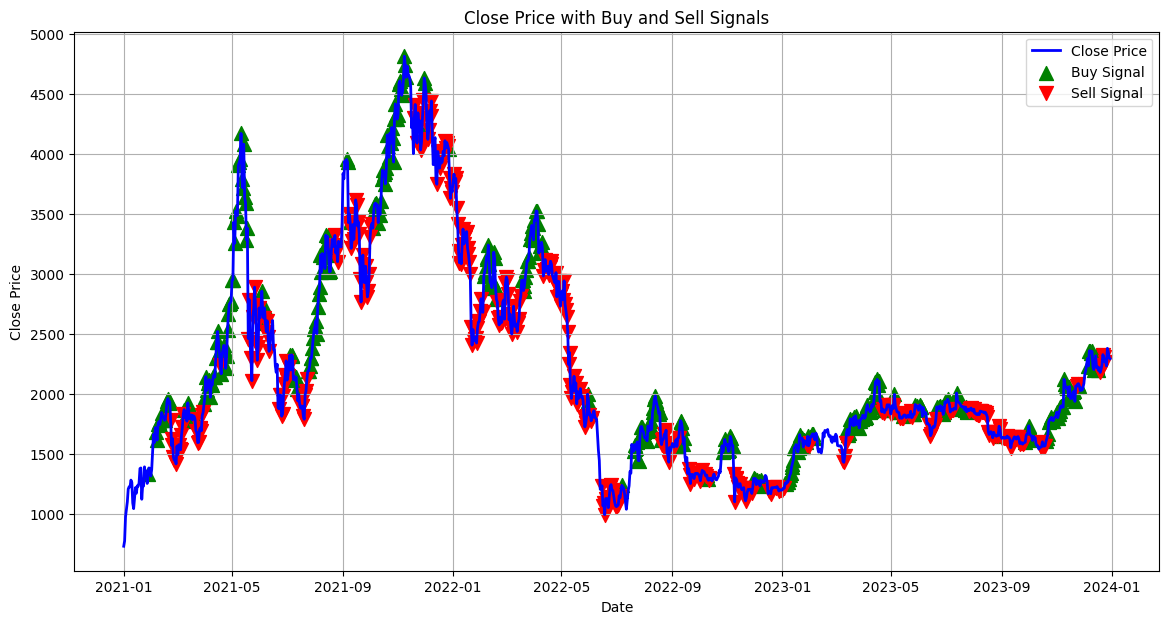

In [159]:
# Identify buy and sell points
cryptocurrency_df['Buy_Point'] = cryptocurrency_df['Buy_Signal'] == 1
cryptocurrency_df['Sell_Point'] = cryptocurrency_df['Sell_Signal'] == 1

# Plot Close price with buy and sell points
plt.figure(figsize=(14, 7))
plt.plot(cryptocurrency_df['Date'], cryptocurrency_df['Close'], label='Close Price', color='blue', lw=2)

# Plot buy points
plt.scatter(cryptocurrency_df['Date'][cryptocurrency_df['Buy_Point']], cryptocurrency_df['Close'][cryptocurrency_df['Buy_Point']], marker='^', color='green', s=100, label='Buy Signal')

# Plot sell points
plt.scatter(cryptocurrency_df['Date'][cryptocurrency_df['Sell_Point']], cryptocurrency_df['Close'][cryptocurrency_df['Sell_Point']], marker='v', color='red', s=100, label='Sell Signal')

plt.title('Close Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

We can identify uptrends and downtrends now, but there is a clutter of buy and sell points. We have to remove that clutter

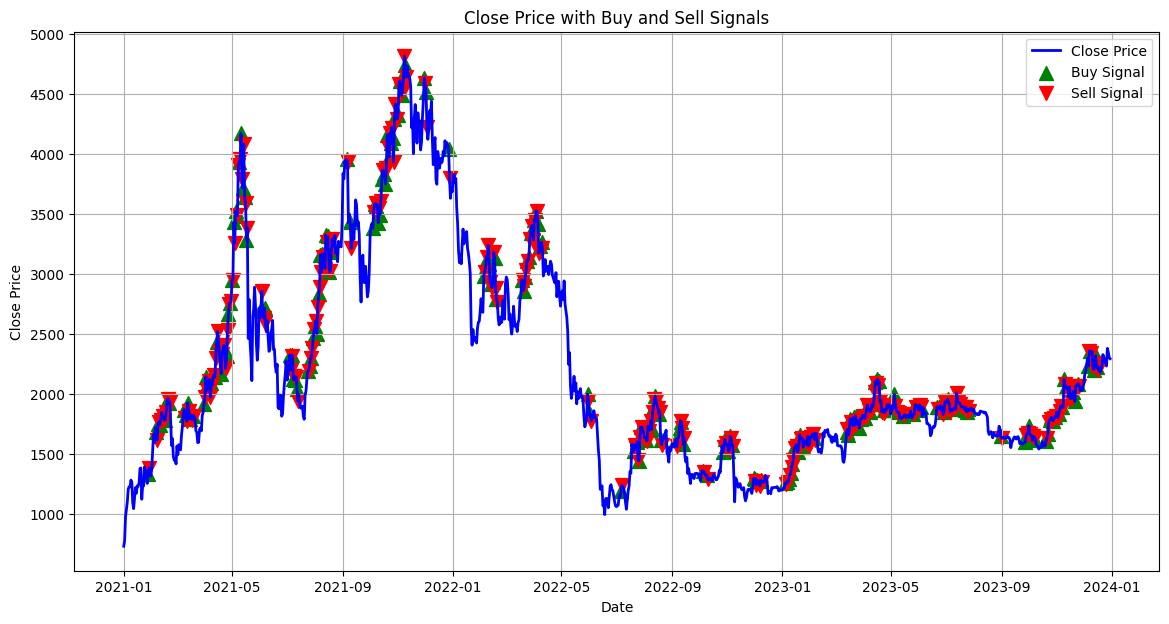

In [160]:
# Initialize position tracking
cryptocurrency_df['Position'] = 0  # Start with position 0 (no position)

# Iterate through DataFrame to apply the signal logic
for i in range(1, len(cryptocurrency_df)):
    if cryptocurrency_df.loc[i, 'Buy_Signal'] == 1 and cryptocurrency_df.loc[i - 1, 'Position'] == 0:
        cryptocurrency_df.loc[i, 'Position'] = 1  # Bought
    elif cryptocurrency_df.loc[i, 'Sell_Signal'] == 1 and cryptocurrency_df.loc[i - 1, 'Position'] == 1:
        cryptocurrency_df.loc[i, 'Position'] = 0  # Sold

# Filter buy and sell points based on Position changes
cryptocurrency_df['Buy_Point'] = (cryptocurrency_df['Position'] == 1) & (cryptocurrency_df['Position'].shift(1) == 0)
cryptocurrency_df['Sell_Point'] = (cryptocurrency_df['Position'] == 0) & (cryptocurrency_df['Position'].shift(1) == 1)

# Plot Close price with buy and sell points
plt.figure(figsize=(14, 7))
plt.plot(cryptocurrency_df['Date'], cryptocurrency_df['Close'], label='Close Price', color='blue', lw=2)

# Plot buy points
plt.scatter(cryptocurrency_df['Date'][cryptocurrency_df['Buy_Point']], cryptocurrency_df['Close'][cryptocurrency_df['Buy_Point']], marker='^', color='green', s=100, label='Buy Signal')

# Plot sell points
plt.scatter(cryptocurrency_df['Date'][cryptocurrency_df['Sell_Point']], cryptocurrency_df['Close'][cryptocurrency_df['Sell_Point']], marker='v', color='red', s=100, label='Sell Signal')

plt.title('Close Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

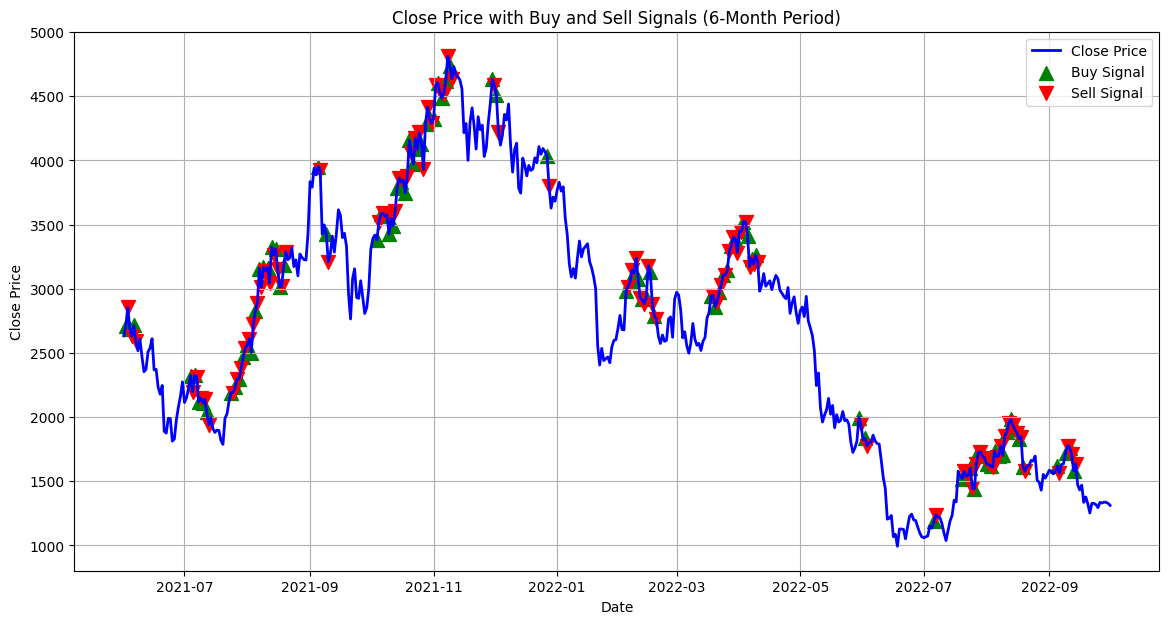

In [161]:
filtered_df = cryptocurrency_df[(cryptocurrency_df['Date'] >= '2021-06-01') & (cryptocurrency_df['Date'] <= '2022-10-01')]

# Plot Close price with buy and sell points for the filtered period
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Date'], filtered_df['Close'], label='Close Price', color='blue', lw=2)

# Plot buy points
plt.scatter(filtered_df['Date'][filtered_df['Buy_Point']], filtered_df['Close'][filtered_df['Buy_Point']], marker='^', color='green', s=100, label='Buy Signal')

# Plot sell points
plt.scatter(filtered_df['Date'][filtered_df['Sell_Point']], filtered_df['Close'][filtered_df['Sell_Point']], marker='v', color='red', s=100, label='Sell Signal')

plt.title('Close Price with Buy and Sell Signals (6-Month Period)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

The clutter isn't going away, will try a different approach

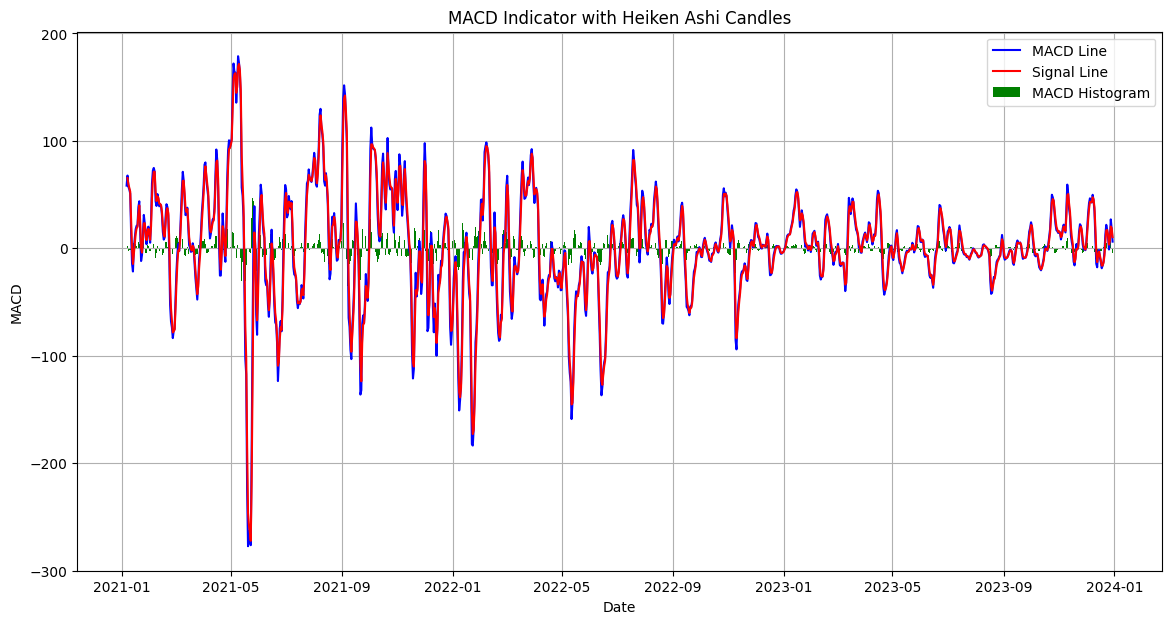

In [162]:
def calculate_macd(df, slow=6, fast=3, signal=2):
    # Calculate MACD Line (3-day EMA - 6-day EMA of HA_Close)
    df['EMA_fast'] = df['HA_Close'].ewm(span=fast, min_periods=fast).mean()
    df['EMA_slow'] = df['HA_Close'].ewm(span=slow, min_periods=slow).mean()
    df['MACD_Line'] = df['EMA_fast'] - df['EMA_slow']

    # Calculate Signal Line (2-day EMA of MACD Line)
    df['Signal_Line'] = df['MACD_Line'].ewm(span=signal, min_periods=signal).mean()

    # Calculate MACD Histogram
    df['MACD_Histogram'] = df['MACD_Line'] - df['Signal_Line']

    return df

# Apply the function to calculate MACD
cryptocurrency_df = calculate_macd(cryptocurrency_df)

# Plotting MACD Line, Signal Line, and Histogram
plt.figure(figsize=(14, 7))
plt.plot(cryptocurrency_df['Date'], cryptocurrency_df['MACD_Line'], label='MACD Line', color='blue')
plt.plot(cryptocurrency_df['Date'], cryptocurrency_df['Signal_Line'], label='Signal Line', color='red')
plt.bar(cryptocurrency_df['Date'], cryptocurrency_df['MACD_Histogram'], label='MACD Histogram', color='green')

plt.title('MACD Indicator with Heiken Ashi Candles')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.show()

## **Generate buy and sell points to calculate returns**

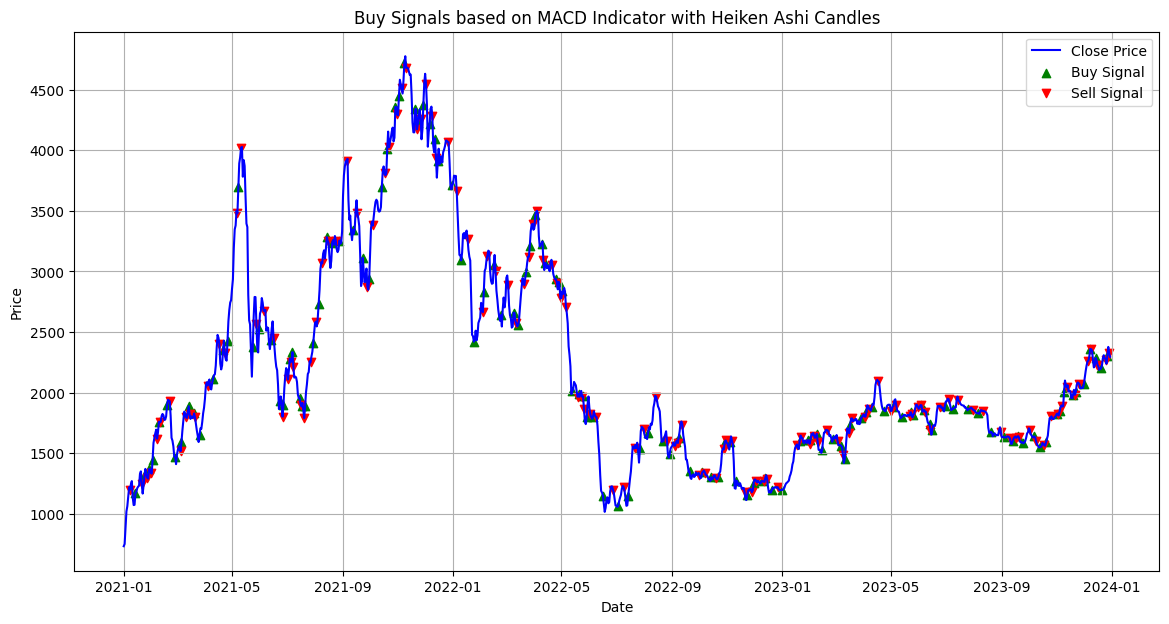

In [163]:
# Generate Buy Signals (MACD Line crosses above Signal Line)
cryptocurrency_df['Buy_Signal'] = np.where((cryptocurrency_df['MACD_Line'] > cryptocurrency_df['Signal_Line']) & (cryptocurrency_df['MACD_Line'].shift(1) <= cryptocurrency_df['Signal_Line'].shift(1)), cryptocurrency_df['HA_Close'], np.nan)
cryptocurrency_df['Sell_Signal'] = np.where((cryptocurrency_df['MACD_Line'] < cryptocurrency_df['Signal_Line']) & (cryptocurrency_df['MACD_Line'].shift(1) >= cryptocurrency_df['Signal_Line'].shift(1)), cryptocurrency_df['HA_Close'], np.nan)

# Plotting Close Price and Buy Signals
plt.figure(figsize=(14, 7))
plt.plot(cryptocurrency_df['Date'], cryptocurrency_df['HA_Close'], label='Close Price', color='blue')
plt.scatter(cryptocurrency_df['Date'], cryptocurrency_df['Buy_Signal'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(cryptocurrency_df['Date'], cryptocurrency_df['Sell_Signal'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Buy Signals based on MACD Indicator with Heiken Ashi Candles')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Now we've got limited and well-differentiated buy and sell points. Notice how the sell points are at peaks and buy points are at throughs. We will finalize with this strategy.

## **Final results**

In [164]:
def calculate_returns(df):
    buy_points = df['Buy_Signal'].dropna().index
    sell_points = df['Sell_Signal'].dropna().index

    # Ensure the first buy signal comes before the first sell signal
    if sell_points[0] < buy_points[0]:
        sell_points = sell_points[1:]

    returns = []
    for buy_idx, sell_idx in zip(buy_points, sell_points):
        buy_price = df.at[buy_idx, 'HA_Close']
        sell_price = df.at[sell_idx, 'HA_Close']
        return_value = sell_price - buy_price
        returns.append(return_value)

    return returns

# Calculate returns based on buy and sell signals
returns = calculate_returns(cryptocurrency_df)

total_trades = 0
total_wins = 0

# Print returns for each trade
for i, ret in enumerate(returns):
    print(f"Trade {i+1}: Price movement = {ret}")
    total_trades = total_trades + 1
    if (ret > 0):
      total_wins = total_wins + 1

win_ratio = total_wins/total_trades

# Calculate total returns
total_returns = sum(returns)
print(f"\nTotal Price movement captured: {total_returns}")
print(f"\nWin ratio: {win_ratio}")

Trade 1: Price movement = 74.87698364257812
Trade 2: Price movement = -12.074859619140625
Trade 3: Price movement = -28.40087890625
Trade 4: Price movement = 173.28982543945312
Trade 5: Price movement = -4.255767822265625
Trade 6: Price movement = 33.7841796875
Trade 7: Price movement = 51.9910888671875
Trade 8: Price movement = 206.82568359375
Trade 9: Price movement = -67.43399047851562
Trade 10: Price movement = -32.06976318359375
Trade 11: Price movement = 410.6369323730469
Trade 12: Price movement = 284.776611328125
Trade 13: Price movement = -20.01507568359375
Trade 14: Price movement = 1054.9434814453125
Trade 15: Price movement = 322.62554931640625
Trade 16: Price movement = 188.3343505859375
Trade 17: Price movement = 150.10272216796875
Trade 18: Price movement = 20.1044921875
Trade 19: Price movement = -132.40011596679688
Trade 20: Price movement = 209.06463623046875
Trade 21: Price movement = -29.4822998046875
Trade 22: Price movement = -122.1934814453125
Trade 23: Price mov

In [165]:
def sharpe_ratio(returns):
    avg_return = np.mean(returns)
    std_deviation = np.std(returns)

    # Assuming risk-free rate is 0 for simplicity
    risk_free_rate = 0

    # Annualize returns and standard deviation if necessary
    annual_avg_return = avg_return
    annual_std_deviation = std_deviation

    # Calculate Sharpe Ratio
    if annual_std_deviation != 0:
        sharpe = (annual_avg_return - risk_free_rate) / annual_std_deviation
        return sharpe
    else:
        return np.nan

# Calculate Sharpe Ratio of the returns
sharpe = sharpe_ratio(returns)

print(f"Sharpe Ratio: {sharpe:.2f}")

Sharpe Ratio: 0.41


In this trading strategy there are plenty of loss trades, hence the high deviation and low sharpe ratio, but the profit trades are much bigger than the loss trades. The strategy hence gets good returns regardless

In [166]:
# Initial amount of money
initial_money = 1000000 # 1 Million USD
transaction_cost = 0.001  # Transaction cost percentage in USD per trade

portfolio = []

# Function to simulate trading
def simulate_trading(df, initial_money, transaction_cost):
    money = initial_money
    shares = 0

    for index, row in df.iterrows():
        if not pd.isnull(row['Buy_Signal']):
            # Calculate how many shares can be bought with available money
            share_price = row['HA_Close'] # We are using HA_Close here as by formula it depicts the average price of ETH in that day
            max_shares = money // share_price
            #print(max_shares)
            shares += max_shares
            money -= max_shares * share_price
            # Deduct transaction cost
            money -= money*transaction_cost

        elif not pd.isnull(row['Sell_Signal']):
            # Sell all shares at sell signal price
            share_price = row['HA_Close']
            money += shares * share_price
            shares = 0
            # Deduct transaction cost
            money -= money*transaction_cost
            print(money)
            portfolio.append(money)

    return money

# Simulate trading and calculate final amount of money
final_money = simulate_trading(cryptocurrency_df, initial_money, transaction_cost)

print(f"Final amount of money after trading: ${final_money:.2f}")

investment_returns = []

for i in range(1, len(portfolio)):
    investment_return = portfolio[i] - portfolio[i - 1]
    investment_returns.append(investment_return)

print(investment_returns)

999000.0
1061731.4941962564
1050909.677907057
1028068.5790914444
1149952.989319026
1146026.5417644957
1165264.8769997503
1205338.3177773834
1360336.4415462385
1310471.627567737
1286221.3671244713
1604911.598667174
1818951.0523650453
1801673.8064374065
2582911.1599238515
2805293.3860483645
3024499.5941555416
3201118.0357803963
3224306.63432417
3000723.493714699
3327505.526946206
3281233.7889052606
3106441.897179385
3017470.541404158
2861494.6574913873
3402110.2192428694
3646613.4454617337
4087162.933709234
4046613.128882264
4062755.488425555
4879136.554229147
5069379.543342616
4679944.5794626735
5382308.771351915
5541090.119751302
5557189.362063759
5473108.542036152
5543239.329826855
5490891.789890493
5276454.658471484
5318517.947164866
5519910.110187593
5596098.353251152
5372577.298079383
5589497.438929286
5509899.542480673
5820702.288583194
6400566.222323639
7071367.83782258
6953184.747370631
7596198.686085858
7344444.48515886
8321580.667248462
8669976.122923264
9142412.204627037
9227

In [167]:
print(final_money/initial_money)

54.28981338867338


That's a return rate of 5328% !!

In [168]:
def calculate_drawdown(asset_values):
    peak = asset_values[0]
    drawdown = 0.0
    max_drawdown = 0.0

    for value in asset_values:
        if value > peak:
            peak = value
        else:
            drawdown = (peak - value) / peak * 100
            if drawdown > max_drawdown:
                max_drawdown = drawdown

    return max_drawdown

max_drawdown = calculate_drawdown(portfolio)
print(f"Maximum Drawdown: {max_drawdown}%")

Maximum Drawdown: 22.134935147424585%


It's near the ideal range of < 20% which is decent
